In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib import gridspec
import cv2
import os
import time
from preprocessing import PreProcessing
from model import TripletLoss

c:\users\kuruparans\anaconda3\envs\imtf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\kuruparans\anaconda3\envs\imtf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\kuruparans\anaconda3\envs\imtf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\kuruparans\anaconda3\envs\imtf\lib\site-packages\ten

In [2]:
# Read Dataset. Split into training and test set
def get_train_test_dataset(train_test_ratio):
    data_src = './data_repository/Veri776/'
    X = []
    y = []
    for directory in os.listdir(data_src):
        try:
            for pic in os.listdir(os.path.join(data_src, directory)):
                img = cv2.imread(os.path.join(data_src, directory, pic))
                img = cv2.resize(img, (28, 28)) 

                X.append(np.squeeze(np.asarray(img)))
                y.append(directory)
        except:
            pass

    labels = list(set(y))
    print(labels)
    label_dict = dict(zip(labels, range(len(labels))))
    print(label_dict)
    Y = np.asarray([label_dict[label] for label in y])
    print(len(Y))
    shuffle_indices = np.random.permutation(np.arange(len(y)))
    x_shuffled = []
    y_shuffled = []
    for index in shuffle_indices:
        x_shuffled.append(X[index])
        y_shuffled.append(Y[index])

    size_of_dataset = len(x_shuffled)
    n_train = int(np.ceil(size_of_dataset * train_test_ratio))
    n_test = int(np.ceil(size_of_dataset * (1 - train_test_ratio)))
    return np.asarray(x_shuffled[0:n_train]), np.asarray(x_shuffled[n_train + 1:size_of_dataset]), np.asarray(y_shuffled[0:n_train]), np.asarray(y_shuffled[
                                                                                                  n_train + 1:size_of_dataset])

In [3]:
train_images, test_images, train_label, test_label = get_train_test_dataset(0.7)

['101', '031', '746', '309', '500', '708', '646', '074', '731', '276', '540', '372', '145', '071', '323', '534', '205', '199', '721', '348', '355', '457', '138', '246', '035', '706', '125', '592', '154', '465', '776', '700', '269', '278', '098', '081', '371', '406', '670', '324', '208', '568', '231', '136', '318', '272', '451', '693', '274', '687', '633', '427', '268', '073', '414', '551', '625', '719', '623', '397', '763', '261', '636', '370', '351', '161', '082', '738', '019', '249', '354', '207', '341', '314', '094', '335', '024', '373', '499', '330', '357', '122', '127', '296', '065', '771', '516', '543', '230', '213', '311', '273', '291', '243', '614', '640', '444', '699', '643', '718', '611', '440', '442', '116', '454', '560', '036', '011', '376', '629', '545', '010', '171', '032', '217', '603', '698', '754', '189', '696', '501', '061', '669', '302', '401', '435', '749', '765', '620', '767', '169', '005', '737', '684', '394', '554', '583', '079', '033', '182', '327', '701', '055'

In [4]:
test_images.shape

(14795, 28, 28, 3)

In [5]:
train_images.shape


(34527, 28, 28, 3)

In [6]:
#helper function to plot image
def show_image(idxs, data):
    if type(idxs) != np.ndarray:
        idxs = np.array([idxs])
    fig = plt.figure()
    gs = gridspec.GridSpec(1,len(idxs))
    for i in range(len(idxs)):
        ax = fig.add_subplot(gs[0,i])
        ax.imshow(data[idxs[i],:,:,:])
        ax.axis('off')
    plt.show()

## Triplet Loss

In [7]:
#model_path = './trained_model/model_triplet/'

In [8]:
model_path = './model_triplet/'

In [9]:
model = TripletLoss()

In [10]:
# Input and Output Tensor
img_placeholder = tf.placeholder(tf.float32, [None, 28, 28, 3], name='img')
net = model.conv_net(img_placeholder, reuse=False)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.


676
********** QUERY IMAGE **********


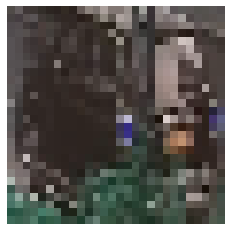

In [11]:
# Generate random index from test_images corpus and display the image
idx = np.random.randint(0, len(test_images))
im = test_images[idx]
label1=test_label[idx]
print(label1)
#show the test image
print("********** QUERY IMAGE **********")
show_image(idx, test_images)

In [12]:
idx

2668

In [13]:
len(test_images)

14795

In [14]:
len(test_label)

14795

In [15]:
test_images[0]

array([[[ 66,  56,  56],
        [ 66,  57,  53],
        [ 68,  58,  51],
        ...,
        [ 55,  50,  51],
        [ 52,  47,  48],
        [ 54,  49,  50]],

       [[ 67,  57,  57],
        [ 65,  55,  54],
        [ 65,  57,  56],
        ...,
        [ 53,  50,  52],
        [ 50,  46,  51],
        [ 51,  46,  48]],

       [[ 65,  56,  59],
        [ 63,  52,  52],
        [ 59,  52,  53],
        ...,
        [ 50,  44,  47],
        [ 52,  49,  51],
        [ 56,  51,  53]],

       ...,

       [[129, 119, 119],
        [129, 122, 125],
        [122, 121, 123],
        ...,
        [123, 124, 126],
        [128, 127, 131],
        [135, 133, 133]],

       [[135, 129, 126],
        [129, 125, 127],
        [126, 122, 127],
        ...,
        [170, 170, 171],
        [140, 140, 141],
        [132, 134, 135]],

       [[110, 111, 115],
        [129, 128, 132],
        [124, 122, 128],
        ...,
        [119, 117, 117],
        [124, 122, 122],
        [187, 187, 187]]

In [16]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)
def parse_img(img, label):
    return (img, label)
test_dataset = _normalize_img(test_images,test_label)
train_dataset = _normalize_img(train_images,train_label)



## Find k nearest neighbour using cosine similarity 

In [17]:
# Compute Vector representation for each training images and normalize those
def generate_db_normed_vectors():
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        ckpt = tf.train.get_checkpoint_state(model_path)
        saver.restore(sess, model_path+"model.ckpt")
        train_vectors = sess.run(net, feed_dict={img_placeholder:train_images})      
    normalized_train_vectors = train_vectors/np.linalg.norm(train_vectors,axis=1).reshape(-1,1)
    return normalized_train_vectors

In [18]:
# Find k nearest neighbour using cosine similarity
def find_k_nn(normalized_train_vectors,vec,k):
    dist_arr = np.matmul(normalized_train_vectors, vec.T)
    return np.argsort(-dist_arr.flatten())[:k]

In [19]:
normalized_training_vectors = generate_db_normed_vectors()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./model_triplet/model.ckpt


In [20]:
im.shape

(28, 28, 3)

In [21]:
cv2.imshow('ImageWindow',im)
cv2.waitKey(0)


-1

In [22]:
# Compute vector representation of test image 
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state(model_path)
    saver.restore(sess, model_path+"model.ckpt")
    search_vector = sess.run(net, feed_dict={img_placeholder:[im]}) 
normalized_search_vec = search_vector/np.linalg.norm(search_vector)

INFO:tensorflow:Restoring parameters from ./model_triplet/model.ckpt


In [23]:
normalized_search_vec

array([[ 0.19531849, -0.09867153, -0.14076075,  0.16696696,  0.14774723,
        -0.27510005,  0.21071622,  0.45520213,  0.11694082,  0.06737936,
         0.17092367, -0.15527968, -0.32947895, -0.01535278,  0.0428389 ,
         0.00702573,  0.1264644 , -0.1561823 , -0.05696518,  0.22173259,
        -0.20662665, -0.32146174, -0.13014433,  0.00543994,  0.02847176,
         0.28869393, -0.17513177,  0.04963113]], dtype=float32)

Total time to find nn: 2.00 ms


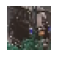

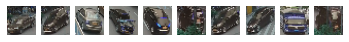

Index of Similar images: [32805 33803 29037 12686 33276 15427  5522 32571 29577 16368]


In [24]:
s_time = time.time()
k = 10
candidate_index = find_k_nn(normalized_training_vectors, normalized_search_vec, k)
print('Total time to find nn: {:0.2f} ms'.format((time.time()-s_time)*1000))
fig = plt.figure(figsize=(10, 0.8))
idxs = [idx]
gs = gridspec.GridSpec(1, len(idxs))
# plot test image
for i in range(len(idxs)):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(test_images[idxs[i], :, :, :])
    ax.axis('off')
plt.show()
# plot similar images
show_image(candidate_index, train_images)
print("Index of Similar images:", candidate_index)


In [25]:
idxs

[2668]

In [26]:
train_label[candidate_index]

array([428, 575, 361, 737, 348, 465, 575, 272, 294, 511])

In [27]:
 candidate_index

array([32805, 33803, 29037, 12686, 33276, 15427,  5522, 32571, 29577,
       16368], dtype=int64)

156
********** QUERY IMAGE **********


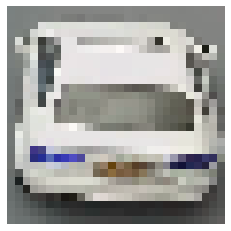

In [28]:
# Generate random index from test_images corpus and display the image
idx = 156
im = test_images[idx]
print(idx)
#show the test image
print("********** QUERY IMAGE **********")
show_image(idx, test_images)

INFO:tensorflow:Restoring parameters from ./model_triplet/model.ckpt
Total time to find nn: 1.99 ms


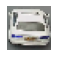

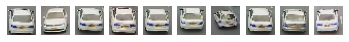

Index of Similar images: [ 6768 25934 28934 33923  1183 28142 10339  3469 25801 21156]


In [29]:
# Compute vector representation of test image 
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state(model_path)
    saver.restore(sess, model_path+"model.ckpt")
    search_vector = sess.run(net, feed_dict={img_placeholder:[im]}) 
normalized_search_vec = search_vector/np.linalg.norm(search_vector)

s_time = time.time()
k = 10
candidate_index = find_k_nn(normalized_training_vectors, normalized_search_vec, k)
print('Total time to find nn: {:0.2f} ms'.format((time.time()-s_time)*1000))
fig = plt.figure(figsize=(10, 0.8))
idxs = [idx]
gs = gridspec.GridSpec(1, len(idxs))
# plot test image
for i in range(len(idxs)):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(test_images[idxs[i], :, :, :])
    ax.axis('off')
plt.show()
# plot similar images
show_image(candidate_index, train_images)
print("Index of Similar images:", candidate_index)

In [30]:
train_label[candidate_index]

array([286, 421, 421, 335, 421, 574, 314, 421, 209, 526])

## VISUALIZATION 

In [37]:
#helper function to plot imageS
def show_top_k_images(indx_list,test_image_indexes, train_data, test_data):
    fig = plt.figure(figsize=(20, 40))
    gs = gridspec.GridSpec(len(indx_list),len(indx_list[0])+2)
    for i in range(len(indx_list)):
        ax = fig.add_subplot(gs[i,0])
        ax.imshow(test_data[test_image_indexes[i],:,:,:])
        print(test_image_indexes[i],test_label[test_image_indexes[i]])
        print("getting train images")
        ax.axis('off')
        for j in range(len(indx_list[0])):
            ax = fig.add_subplot(gs[i,j+2])
            ax.imshow(train_data[indx_list[i][j],:,:,:])
            print(indx_list[i][j],train_label[indx_list[i][j]])
            ax.axis('off')
    plt.savefig('./figures/similar_images.jpg')
    plt.show()

In [56]:
K = 20
N = 20
indx_list = []
test_image_indexes = []
_test_images = []
for i in range(N):
    idx = i
    test_image_indexes.append(idx)
    _test_images.append(test_images[idx])
    #run the test image through the network to get the test features
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state(model_path)
    saver.restore(sess, model_path+"model.ckpt")
    search_vectors = sess.run(net, feed_dict={img_placeholder:_test_images})
    
normalized_search_vecs = search_vectors/np.linalg.norm(search_vectors,axis=1).reshape(-1,1)
for i in range(len(normalized_search_vecs)):
    candidate_index = find_k_nn(normalized_training_vectors, normalized_search_vecs[i], K)
    indx_list.append(candidate_index)

INFO:tensorflow:Restoring parameters from ./model_triplet/model.ckpt


**Query Image**       *************************** Top 20 Similar Images  ***************************
0 502
getting train images
34262 347
27879 433
14526 639
24089 381
24862 150
10125 155
1430 502
7333 711
8721 178
22897 189
18933 362
33003 760
6307 569
20316 325
21771 36
23363 281
22906 414
8455 433
21874 158
934 524
1 602
getting train images
20682 25
25117 675
2748 187
12739 753
13291 506
19651 401
19816 700
13684 692
14970 716
26180 511
28874 272
5401 729
4073 341
32887 78
9626 311
23343 185
19680 198
21147 571
17715 67
10160 724
2 521
getting train images
24651 516
25668 761
23291 50
33290 201
16274 516
24659 761
17428 201
5035 567
22000 525
690 521
16848 583
21212 109
34424 312
32907 259
33935 221
18951 589
7586 201
28303 201
11128 761
13942 201
3 681
getting train images
17524 681
23929 629
16801 681
4964 151
4577 374
8034 411
16617 757
7881 374
16206 681
11622 681
32680 290
10072 681
2408 151
18290 644
26270 374
31463 644
33744 147
21695 22
34069 411
18821 151
4 751
getting tra

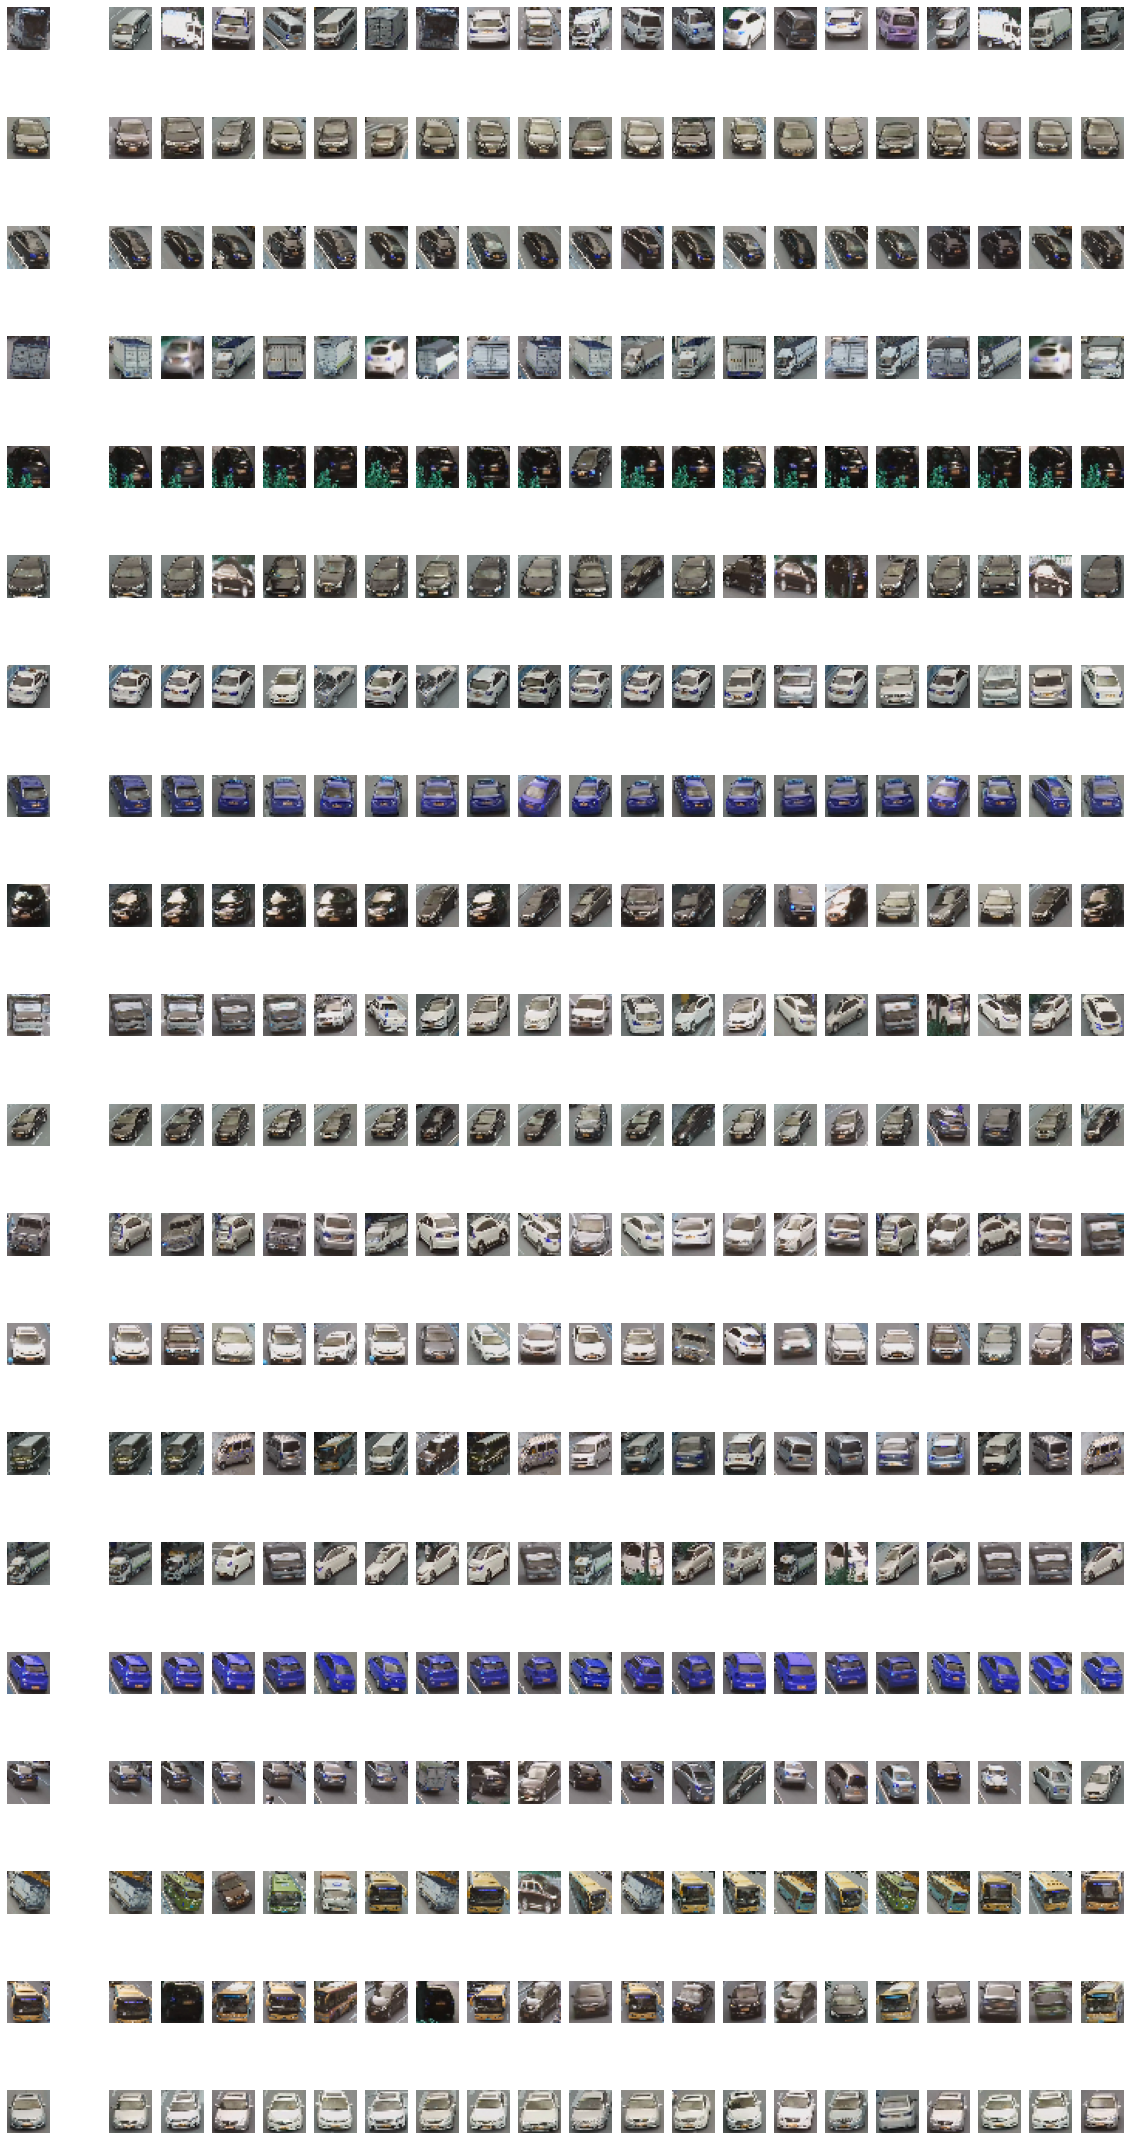

In [57]:
print('**Query Image**       *************************** Top %d Similar Images  ***************************' % K)
show_top_k_images(indx_list,test_image_indexes, train_images, test_images)


In [58]:
MeanAveragePrecision2(indx_list,test_image_indexes, train_images, test_images)

0.07142857142857142
0.0
0.05
0.4694444444444444
0.0
0.5
0.5
0.6666666666666666
0.0
0.25
0.0
0.125
0.5
0.59375
0.35357142857142854
0.7147619047619048
0.59375
0.3896103896103896
0.393939393939394
0.0
0.30859613997113994


0.30859613997113994

In [52]:
def MeanAveragePrecision(indx_list,test_image_indexes, train_images, test_images):
    mAP=0
    for i in range(len(indx_list)):
        print(test_image_indexes[i],test_label[test_image_indexes[i]])
        Qlabel=test_label[test_image_indexes[i]]
        print("getting train images")
        c=1
        AP=0
        for j in range(len(indx_list[0])):
            print(indx_list[i][j],train_label[indx_list[i][j]])
            dblabel=train_label[indx_list[i][j]]
            if(dblabel==Qlabel):
                AP=AP+c/(j+1)
                print("internal",AP)
                c=c+1
            elif(dblabel!=Qlabel):
                AP=AP+0/(j+1)
        print(c)
        AP=AP/c
        print(AP)
        mAP=mAP+AP
    mAP=mAP/len(indx_list)
    print(mAP)
    return(mAP) 

In [53]:
 MeanAveragePrecision(indx_list,test_image_indexes, train_images, test_images)

0 502
getting train images
34262 347
27879 433
14526 639
24089 381
24862 150
1
0.0
1 602
getting train images
20682 25
25117 675
2748 187
12739 753
13291 506
1
0.0
2 521
getting train images
24651 516
25668 761
23291 50
33290 201
16274 516
1
0.0
3 681
getting train images
17524 681
internal 1.0
23929 629
16801 681
internal 1.6666666666666665
4964 151
4577 374
3
0.5555555555555555
4 751
getting train images
18905 141
21184 739
17412 133
416 494
15095 157
1
0.0
0.11111111111111109


0.11111111111111109

In [55]:
def MeanAveragePrecision2(indx_list,test_image_indexes, train_images, test_images):
    mAP=0
    for i in range(len(indx_list)):
        #print(test_image_indexes[i],test_label[test_image_indexes[i]])
        Qlabel=test_label[test_image_indexes[i]]
        #print("getting train images")
        c=1
        AP=0
        for j in range(len(indx_list[0])):
         #   print(indx_list[i][j],train_label[indx_list[i][j]])
            dblabel=train_label[indx_list[i][j]]
            if(dblabel==Qlabel):
                AP=AP+c/(j+1)
          #      print("internal",AP)
                c=c+1
            elif(dblabel!=Qlabel):
                AP=AP+0/(j+1)
        #print(c)
        AP=AP/c
        print(AP)
        mAP=mAP+AP
    mAP=mAP/len(indx_list)
    print(mAP)
    return(mAP) 

 MeanAveragePrecision(indx_list,test_image_indexes, train_images, test_images)

In [25]:
IMG_SIZE = 32 # Specify height and width of image to match the input format of the
BATCH_SIZE = 256 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically to reduce GPU and CPU idle time
SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observationsmodel
CHANNELS = 3 # Keep RGB color channels to match the input format of the model
def parse_function(filename, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

def create_dataset(filenames, labels, is_training=True):
    """Load and parse dataset.
    Args:
        filenames: list of image paths
        labels: numpy array of shape (BATCH_SIZE, N_LABELS)
        is_training: boolean to indicate training mode
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    #for element in dataset: 
     #     print(element) 
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_img, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset


In [26]:
test_ds = create_dataset(test_dataset[0], test_dataset[1])

In [27]:
# Save test embeddings for visualization in projector
np.savetxt("vecs_imtf.tsv", normalized_search_vecs , delimiter='\t')



In [36]:
import io

In [37]:
out_m = io.open('meta_imtf.tsv', 'w', encoding='utf-8')
for  labels in test_label:
    [out_m.write(str(x) + "\n") for x in labels]
out_m.close()

 #https://projector.tensorflow.org/

TypeError: 'numpy.int32' object is not iterable

In [31]:
for img, labels in tfds.as_numpy(test_ds):
    print(img,labels)

NameError: name 'tfds' is not defined

In [1]:
for  labels in test_label:
    [print(x) for x in labels]

NameError: name 'test_label' is not defined

In [34]:
test_label

array([273, 500, 594, ..., 239, 565,  38])

                           ---------------------- *** --------------------